# Final Project Submission

* Student name:**DEBREUS Monitès** 
* Student pace: self paced
* Scheduled project review date/time:20 Juillet 2025
* Instructor name: **Wedter Jerome, Geovany Laguerre**


## Aperçu du travail

Ce travail constitue un aperçu analytique réalisé en réponse à la demande d'une compagnie souhaitant se lancer dans l'industrie cinématographique en créant un nouveau studio de production. N’ayant aucune expérience préalable dans ce domaine, l’entreprise cherche à s’appuyer sur une étude fondée sur des données concrètes pour orienter ses choix de production.

Pour ce faire, on s'appuie sur un vaste jeu de données concernant l'industrie cinématographique (incluant des informations sur les films et leurs genres, leurs notes, leur nombre de votes, leurs revenus et d'autres facteurs pertinents) pour tirer des conclusions qui seront utiles à la compagnie pour mieux orienter ses choix de production et maximiser les chances de succès commercial et critique de ses futurs genres de films.

## Compréhension des données disponibles :

Pour faire cette analyse, il y a 6 groupes de données disponibles issus tous de sources différentes riches en information. Ce groupe de données est essentiel pour la prise de décisions concernant les activités cinématographiques.

* Particulièrement, la base de données **IMDb**, avec sa structure détaillée incluant les informations de base des films (movie_basics), les données de réception publique (movie_ratings avec les colonnes averageRating, numVotes), et les détails sur les talents impliqués (persons, principals pour les rôles spécifiques, directors, writers), est très utile pour ce projet. Sa richesse en métadonnées filmiques et sa décomposition en tables spécialisées permettent une exploration approfondie des caractéristiques des films et de leur réception, offrant un fondement pour comprendre les facteurs influençant le succès cinématographique et pour guider les décisions du nouveau studio.

* Ajouté à cela, les fichiers **bom.movie_gross.csv.gz** et **tn.movie_budgets.csv.gz**, contenant respectivement des colonnes telles que title, studio, domestic_gross, foreign_gross, et production_budget, domestic_gross, worldwide_gross, sont fondamentaux pour enrichir la base de données **IMDb** et évaluer le succès financier des films. Ils permettent ainsi de joindre les informations de base des films avec leurs performances au box-office, offrant la possibilité de calculer des métriques de revenu essentielles comme le revenu_total (somme de domestic_gross et foreign_gross) et d'analyser la marge_brute (en déduisant un budget si disponible).

* En complément de ces ensembles, d'autres fichiers annexes sont également disponibles. Ils fournissent des informations pertinentes qui viennent appuyer l’analyse, en apportant des perspectives supplémentaires sur les tendances du marché, le contexte de diffusion, ou encore les indicateurs de popularité selon différentes plateformes


## Lecture des fichiers

In [583]:
# Importation des bibliothèques
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [584]:
bom_movie=pd.read_csv("bom.movie_gross.csv.gz")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [585]:
rt_review=pd.read_csv("rt.reviews.tsv.gz", sep="\t", encoding='latin1')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [586]:
tmdb_movie=pd.read_csv("tmdb.movies.csv.gz")
tmdb_movie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [587]:
tn_movie_budget=pd.read_csv("tn.movie_budgets.csv.gz")
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [588]:
rt_movie_info= pd.read_csv("rt.movie_info.tsv.gz", sep="\t", encoding='latin1')
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [589]:
conn=sqlite3.connect('im.db')

In [590]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table' """, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [591]:
pd.read_sql("""SELECT * FROM movie_basics""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [592]:
pd.read_sql("""SELECT * 
               FROM movie_ratings 
               WHERE numvotes>10000 """, conn)

,movie_id,averagerating,numvotes
0,tt1043726,4.2,50352
1,tt1210166,7.6,326657
2,tt1212419,6.5,87288
3,tt1229238,7.4,428142
4,tt1232829,7.2,477771
...,...,...,...
2672,tt6990206,7.0,32800
2673,tt7008872,7.0,18768
2674,tt7048622,7.7,11168
2675,tt7315484,5.2,22399


In [593]:
pd.read_sql("""SELECT * 
               FROM persons""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Choix des sources de donnees pour le travail
- imdb
- bom.movie_gross
- tn.movie_budgets.csv.gz

### Justification du choix
Les informattions fournies par la base de données IMDb*, bom.movie_gross.csv.gz* et tn.movie_budgets.csv.gz  sont les trois sources jugées les plus pertinentes pour faire le travail. Si bien que la base IMDb fournit des métadonnées filmiques et des indicateurs de réception publique, bom.movie_gross.csv.gz et tn.movie_budgets.csv.gz complète ces données en fournissant spécifiquement des details sur les coûts de production, les rentrées, permettant ainsi le calcul de la rentabilité. 

## Data cleaning

- $ imdb $

In [594]:
movie_df=pd.read_sql("""SELECT 
                        mb.movie_id,
                        mb.original_title,
                        mb.genres,
                        mb.runtime_minutes,
                        mb.start_year,
                        mr.averagerating,
                        mr.numvotes
                        FROM
                        movie_basics AS mb
                        JOIN
                        movie_ratings AS mr ON mr.movie_id=mb.movie_id
                         """,conn)
movie_df.head()

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",175.0,2013,7.0,77
1,tt0066787,Ashad Ka Ek Din,"Biography,Drama",114.0,2019,7.2,43
2,tt0069049,The Other Side of the Wind,Drama,122.0,2018,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",NaN,2018,6.1,13
4,tt0100275,La Telenovela Errante,"Comedy,Drama,Fantasy",80.0,2017,6.5,119


In [595]:
movie_df.describe()

,runtime_minutes,start_year,averagerating,numvotes
count,66236.000000,73856.000000,73856.000000,7.385600e+04
mean,94.654040,2014.276132,6.332729,3.523662e+03
std,208.574111,2.614807,1.474978,3.029402e+04
min,3.000000,2010.000000,1.000000,5.000000e+00
25%,81.000000,2012.000000,5.500000,1.400000e+01
50%,91.000000,2014.000000,6.500000,4.900000e+01
75%,104.000000,2016.000000,7.400000,2.820000e+02
max,51420.000000,2019.000000,10.000000,1.841066e+06


In [596]:
movie_df.isnull().sum()

movie_id              0
original_title        0
genres              804
runtime_minutes    7620
start_year            0
averagerating         0
numvotes              0
dtype: int64

In [597]:
col1=["genres","runtime_minutes"]
movie_df=movie_df.dropna(subset=col1)
movie_df.isnull().sum()

movie_id           0
original_title     0
genres             0
runtime_minutes    0
start_year         0
averagerating      0
numvotes           0
dtype: int64

In [598]:
def clean_num(num):
    num =num.apply(pd.to_numeric,errors='coerce')
    return num

In [599]:
movie_df['numvotes'] =clean_num(movie_df['numvotes'])
movie_df['averagerating'] =clean_num(movie_df['averagerating'])
movie_df['runtime_minutes'] =clean_num(movie_df['runtime_minutes'])

In [600]:
def minuscule(minus):
    minus=minus.str.lower()
    return minus

In [601]:
movie_df['original_title'] = minuscule(movie_df['original_title'])
movie_df['genres'] = minuscule(movie_df['genres'])
movie_df

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes
0,tt0063540,sunghursh,"action,crime,drama",175.0,2013,7.0,77
1,tt0066787,ashad ka ek din,"biography,drama",114.0,2019,7.2,43
2,tt0069049,the other side of the wind,drama,122.0,2018,6.9,4517
4,tt0100275,la telenovela errante,"comedy,drama,fantasy",80.0,2017,6.5,119
6,tt0137204,joe finds grace,"adventure,animation,comedy",83.0,2017,8.1,263
...,...,...,...,...,...,...,...
73849,tt9911774,padmavyuhathile abhimanyu,drama,130.0,2019,8.4,365
73850,tt9913056,swarm season,documentary,86.0,2019,6.2,5
73851,tt9913084,diabolik sono io,documentary,75.0,2019,6.2,6
73852,tt9914286,sokagin çocuklari,"drama,family",98.0,2019,8.7,136


In [602]:
movie_df['movie_id'].nunique()
# ok

65720

In [603]:
# check sur les runtime_minutes
movie_df.sort_values(by='runtime_minutes',ascending=False)

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes
70280,tt8273150,logistics,documentary,51420.0,2012,5.0,17
27683,tt2659636,modern times forever,documentary,14400.0,2011,6.2,69
15171,tt2008009,the clock,drama,1440.0,2010,8.9,219
71441,tt8677246,bullfighting memories,"comedy,history",1100.0,2017,8.6,5
72424,tt9047474,la flor,"drama,fantasy,musical",808.0,2018,8.5,100
...,...,...,...,...,...,...,...
66397,tt7349926,the coffin club,"documentary,musical",4.0,2017,9.4,5
57389,tt5884852,donald trump courageously stands up to bill cl...,documentary,4.0,2016,4.3,6
20749,tt2258391,hermeneutics,"documentary,history,war",3.0,2012,6.2,8
66527,tt7379378,i heart ny,"biography,documentary",3.0,2017,7.8,5


- Selon ces donnees, les durees de 'Logistics' et 'Modern Times Forever' de genre 'Documentary' sont respectivement de 51420 et 14400 minutes, ce qui a environ corespond pres de 36 et 10 jours continus.
- Selon la litterature, ils font parties des documentaires les plus longs. Le premier suit en temps réel la production et la logistique d’un produit électronique, du magasin à l’usine.
- Sa durée énorme (51420 minutes) va beaucoup influencer les statistiques (moyennes, max, etc.), ce qui peut fausser certaines analyses lors qu'on tient compte des objectifs du travail. De ce fait on les exclut de cette analyse.

In [604]:
movie_df=movie_df[movie_df['runtime_minutes']<14400]
movie_df.sort_values(by='runtime_minutes',ascending=False)

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes
15171,tt2008009,the clock,drama,1440.0,2010,8.9,219
71441,tt8677246,bullfighting memories,"comedy,history",1100.0,2017,8.6,5
72424,tt9047474,la flor,"drama,fantasy,musical",808.0,2018,8.5,100
67287,tt7528992,europa: the last battle,documentary,746.0,2017,8.2,162
20818,tt2261469,double fine adventure,documentary,724.0,2015,8.5,59
...,...,...,...,...,...,...,...
66397,tt7349926,the coffin club,"documentary,musical",4.0,2017,9.4,5
57389,tt5884852,donald trump courageously stands up to bill cl...,documentary,4.0,2016,4.3,6
66527,tt7379378,i heart ny,"biography,documentary",3.0,2017,7.8,5
47173,tt4597838,limitless,"biography,documentary",3.0,2015,6.7,10


### Cleaning
- $ tn.movie_budgets.csv.gz $
- $ bom.movie_gross.csv.gz $

In [605]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
    )
    return df

In [606]:
# Tables CSV/TSV
bom_movie = clean_columns(bom_movie)
tn_movie_budget = clean_columns(tn_movie_budget)

In [607]:
tn_movie_budget['movie'] = minuscule(tn_movie_budget['movie'])
bom_movie['title']=minuscule(bom_movie['title'])
bom_movie['studio']=minuscule(bom_movie['studio'])

In [608]:
def clean_num2(num2):
    num2 = num2.str.replace('[\$,]', '', regex=True)
    num2 = num2.str.strip()
    num2 = pd.to_numeric(num2, errors='coerce')
    return num2

In [609]:
tn_movie_budget['production_budget']=clean_num2(tn_movie_budget['production_budget'])
tn_movie_budget['domestic_gross']=clean_num2(tn_movie_budget['domestic_gross'])
tn_movie_budget['worldwide_gross']=clean_num2(tn_movie_budget['worldwide_gross'])

In [610]:
bom_movie['domestic_gross']=clean_num(bom_movie['domestic_gross'])
bom_movie['foreign_gross']=clean_num(bom_movie['foreign_gross'])

In [611]:
bom_movie=bom_movie.dropna()

In [612]:
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0
5778,79,"Apr 2, 1999",following,6000,48482,240495
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0


# Resultat et Analyse de donnees

- ### Visualisation des notes moyennes des films

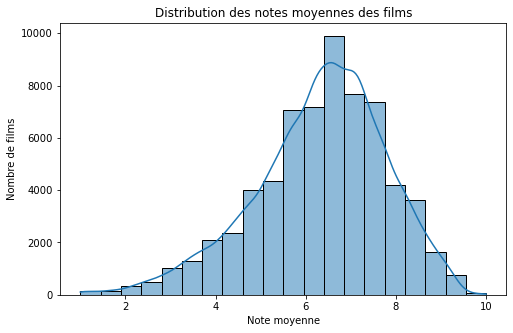

In [613]:
plt.figure(figsize=(8,5))
sns.histplot(movie_df['averagerating'], bins=20, kde=True)
plt.title("Distribution des notes moyennes des films")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()

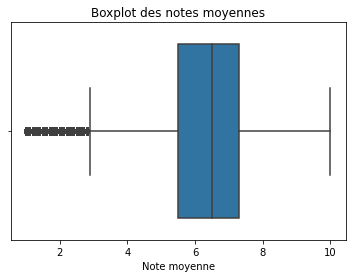

In [615]:
plt.figure(figsize=(6,4))
sns.boxplot(x=movie_df['averagerating'])
plt.title("Boxplot des notes moyennes")
plt.xlabel("Note moyenne")
plt.show();

Le graphique révèle que la majorité des notes moyennes de films se situent entre 5.5 et 7.0, avec une médiane 6.5, ce qui signifie que la moitié des films ont une note moyenne de 6.5 ou moins, et l'autre moitié a une note plus élevée. La distribution n'est pas symétrique ; la médiane est plus proche du troisième quartile, suggérant une légère asymétrie vers les notes plus élevées au sein de la partie centrale de la distribution.
Cependant, le point le plus frappant est la présence d'une importante concentration de films avec des notes moyennes très faibles (autour de 1.0). Ces films sont clairement distincts de la majorité et indiquent une catégorie de productions très mal notées.

In [620]:
#Test de normalite
stat, p = stats.normaltest(movie_df['averagerating'])
print(f"test de normalite: statistic = {stat:.8f}, p-value = {p:.5f}")

test de normalite: statistic = 3047.11988081, p-value = 0.00000


- Étant donné que la p-valeur est inférieure au seuil de 5 %, nous disposons d’éléments suffisants pour confirmer que les notes moyennes s’écartent significativement de la normalité.

- L’analyse préliminaire met en évidence une forte variabilité des des notes des films. Certains titres sont notés par des milliers de spectateurs, tandis que d’autres n’en comptent qu’une poignée

-  Dans ce contexte, se baser uniquement sur la note moyenne (averagerating) introduirait un biais important : un film peu connu avec une note élevée mais très peu de votes peut artificiellement dominer le classement.

- Pour corriger ce déséquilibre, nous adoptons une approche bayésienne, qui consiste à calculer une moyenne pondérée (WR) en tenant compte à la fois de la note moyenne du film ou du genre de film, du nombre de votes qu’il a reçus, et de la moyenne générale de l’ensemble du corpus. Cette méthode permet d’atténuer l’influence des films peu évalués tout en valorisant ceux dont la note est soutenue par un large public.

- En appliquant cette méthode et en regroupant les films par genre, nous obtenons une évaluation plus fiable et représentative de la qualité perçue, ce qui constitue une base solide pour orienter les choix de production de l’entreprise.

- ### Calcul du score pondéré

$ Score  pondéré $ \( Wr \) :
$$ WR = \frac{v}{v + m} \cdot R + \frac{m}{v + m} \cdot C $$


avec :

-  R  = note moyenne pondérée du genre de films  
-  v  = somme total de votes du genre de films  
-  m  = seuil minimum de votes ,75e quantile dans ce cas 
-  C  = note moyenne globale tous les genres de films

In [621]:
## Calcul de la note moyenne globales de tous les films
#C = total_sum_of_ratings_films / total_num_of_votes_overall
total_sum_of_ratings_films=sum(movie_df['averagerating']*movie_df['numvotes'])
total_num_of_votes_overall=sum(movie_df['numvotes'])
C=total_sum_of_ratings_films/total_num_of_votes_overall
print(f"la note moyenne (C) de tous les films est: {C}")

la note moyenne (C) de tous les films est: 6.898034559910468


In [624]:
movie_df["genres"]

0                action,crime,drama
1                   biography,drama
2                             drama
4              comedy,drama,fantasy
6        adventure,animation,comedy
                    ...            
73849                         drama
73850                   documentary
73851                   documentary
73852                  drama,family
73855                   documentary
Name: genres, Length: 65718, dtype: object

- ### Analyse portée sur les genres uniques

In [625]:
# Nettoyage des genres 
movie_df["genres"]=movie_df["genres"].str.split(",")
movie_df["genres"]

0                [action, crime, drama]
1                    [biography, drama]
2                               [drama]
4              [comedy, drama, fantasy]
6        [adventure, animation, comedy]
                      ...              
73849                           [drama]
73850                     [documentary]
73851                     [documentary]
73852                   [drama, family]
73855                     [documentary]
Name: genres, Length: 65718, dtype: object

In [626]:
#Dégrouper les genres
movie_explode_df=movie_df.explode("genres")
movie_explode_df

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes
0,tt0063540,sunghursh,action,175.0,2013,7.0,77
0,tt0063540,sunghursh,crime,175.0,2013,7.0,77
0,tt0063540,sunghursh,drama,175.0,2013,7.0,77
1,tt0066787,ashad ka ek din,biography,114.0,2019,7.2,43
1,tt0066787,ashad ka ek din,drama,114.0,2019,7.2,43
...,...,...,...,...,...,...,...
73850,tt9913056,swarm season,documentary,86.0,2019,6.2,5
73851,tt9913084,diabolik sono io,documentary,75.0,2019,6.2,6
73852,tt9914286,sokagin çocuklari,drama,98.0,2019,8.7,136
73852,tt9914286,sokagin çocuklari,family,98.0,2019,8.7,136


In [627]:
 movie_explode_df['genres'].isnull().sum()

0

In [628]:
#fonction d'aggregation
def aggregation(movie_explode_df, group_cols):
   
    return (
        movie_explode_df.groupby(group_cols)
        .agg(
            total_vote=('numvotes', 'sum'),
            sum_note_ponderee=(
                'averagerating',
                lambda x: (x * movie_explode_df.loc[x.index, 'numvotes']).sum()
            )
        )
        .reset_index()
    )

In [629]:
#reccuperation des genres avec le nombre de votes et notes ponderees les plus eleves pour obtenir v et r
stat=aggregation(movie_explode_df,'genres')
stat

,genres,total_vote,sum_note_ponderee
0,action,101126583,2.036101e+09
1,adult,136,6.536000e+02
2,adventure,84222953,1.767082e+09
3,animation,15347966,3.332075e+08
4,biography,21603178,4.629716e+08
5,comedy,74181319,1.297675e+09
6,crime,39618088,7.766451e+08
7,documentary,4709816,6.724703e+07
8,drama,119452909,2.208408e+09
9,family,8628442,1.703452e+08


In [630]:
# Calcul du facteur R
stat['R']=stat['sum_note_ponderee']/stat['total_vote']
stat['R']

0     20.134186
1      4.805882
2     20.981000
3     21.710203
4     21.430715
5     17.493291
6     19.603295
7     14.278060
8     18.487685
9     19.742291
10    19.318611
11    16.784261
12    21.581621
13    16.269693
14    19.213678
15    20.858691
16    19.728707
17    19.385417
18    12.755584
19    17.398840
20    21.086188
21    17.600000
22    19.235982
23    18.238396
24    19.626068
25    17.385114
Name: R, dtype: float64

In [631]:
stat['total_vote'].sort_values(ascending=False)

8     119452909
0     101126583
2      84222953
5      74181319
23     48126681
20     42955302
6      39618088
19     26875313
10     26326977
16     24649959
13     23857774
4      21603178
3      15347966
9       8628442
12      7837499
14      5449664
7       4709816
22      3750284
24      2682706
25      2451979
15      1385219
17       123284
11         3469
18          394
1           136
21            8
Name: total_vote, dtype: int64

In [632]:
#les valeur de ['total_vote'] sont tres eleves pour eviter de biaiser les calculs, evitons les nombres de votes qui sont les plus faibles en prenant le 75e quantile
m=stat['total_vote'].quantile(0.75)
m

36432394.25

In [633]:
#application de la formule score pondere
stat['WR']=(stat['total_vote']/(stat['total_vote']+m))*stat['R']+(m/(m+stat['total_vote']))*C
stat['WR'] 

0     16.628601
1      6.898027
2     16.728589
3     11.288438
4     12.307684
5     14.003574
6     13.516771
7      7.742874
8     15.779035
9      9.357508
10    12.108352
11     6.898976
12     9.497603
13    10.606548
14     8.500537
15     7.409399
16    12.075889
17     6.940148
18     6.898098
19    11.355824
20    14.574998
21     6.898037
22     8.049546
23    13.352386
24     7.770986
25     7.559331
Name: WR, dtype: float64

In [634]:
stat=stat.sort_values(by='WR', ascending=False)
stat

,genres,total_vote,sum_note_ponderee,R,WR
2,adventure,84222953,1.767082e+09,20.981000,16.728589
0,action,101126583,2.036101e+09,20.134186,16.628601
8,drama,119452909,2.208408e+09,18.487685,15.779035
20,sci-fi,42955302,9.057636e+08,21.086188,14.574998
5,comedy,74181319,1.297675e+09,17.493291,14.003574
6,crime,39618088,7.766451e+08,19.603295,13.516771
23,thriller,48126681,8.777535e+08,18.238396,13.352386
4,biography,21603178,4.629716e+08,21.430715,12.307684
10,fantasy,26326977,5.086006e+08,19.318611,12.108352
16,mystery,24649959,4.863118e+08,19.728707,12.075889


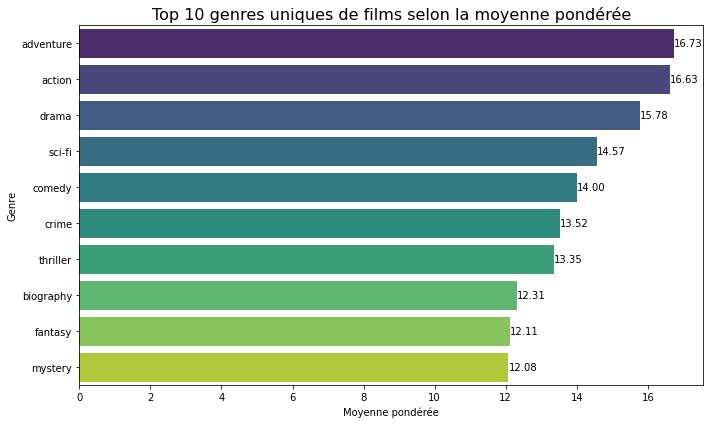

In [635]:
top_genre = stat.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='WR', y='genres', data=top_genre, palette='viridis')  # ax défini ici

# Titre et axes
plt.title('Top 10 genres uniques de films selon la moyenne pondérée', fontsize=16)
plt.xlabel('Moyenne pondérée', fontsize=10)
plt.ylabel('Genre', fontsize=10)

# Ajout des étiquettes sur chaque barre
for i, (wr, genre) in enumerate(zip(top_genre['WR'], top_genre['genres'])):
    ax.text(wr, i, f"{wr:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

Selon cette approche, les genres de films qui sont les plus appréciés en tenant compte des averageratings et de la somme des quantités de votes (v), on trouve les genres uniques suivants en tete  : Adventure,Action, Drama, Sci-Fi,Comedy...


- ###  Voyons l'appréciation des genres uniques des films en fonction de leur durée

In [636]:
#Categorisons les films en intervalles
maximum=movie_explode_df['runtime_minutes'].max()
bins = [0, 60, 90, 120, 150, 180, 240, maximum] 
labels = ['<60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', '180-240 min','>240 min']

movie_explode_df['runtime_bin'] = pd.cut(
    movie_explode_df['runtime_minutes'],
    bins=bins,
    labels=labels,
    right=False,          
    include_lowest=True)
movie_explode_df

,movie_id,original_title,genres,runtime_minutes,start_year,averagerating,numvotes,runtime_bin
0,tt0063540,sunghursh,action,175.0,2013,7.0,77,150-180 min
0,tt0063540,sunghursh,crime,175.0,2013,7.0,77,150-180 min
0,tt0063540,sunghursh,drama,175.0,2013,7.0,77,150-180 min
1,tt0066787,ashad ka ek din,biography,114.0,2019,7.2,43,90-120 min
1,tt0066787,ashad ka ek din,drama,114.0,2019,7.2,43,90-120 min
...,...,...,...,...,...,...,...,...
73850,tt9913056,swarm season,documentary,86.0,2019,6.2,5,60-90 min
73851,tt9913084,diabolik sono io,documentary,75.0,2019,6.2,6,60-90 min
73852,tt9914286,sokagin çocuklari,drama,98.0,2019,8.7,136,90-120 min
73852,tt9914286,sokagin çocuklari,family,98.0,2019,8.7,136,90-120 min


In [637]:
#aggregation by genre pour obtenir v et r
stat2=aggregation(movie_explode_df,['genres','runtime_bin'])
stat2

,genres,runtime_bin,total_vote,sum_note_ponderee
0,action,<60 min,20154.0,383555.7
1,action,60-90 min,2929716.0,48831149.4
2,action,90-120 min,47494636.0,909247961.8
3,action,120-150 min,43612519.0,941575606.5
4,action,150-180 min,6447547.0,120695137.6
...,...,...,...,...
177,western,90-120 min,697869.0,12135961.3
178,western,120-150 min,260415.0,5234896.0
179,western,150-180 min,1420433.0,24364099.6
180,western,180-240 min,304.0,3091.4


In [638]:
stat2.isna().sum()

genres                0
runtime_bin           0
total_vote           23
sum_note_ponderee    23
dtype: int64

In [639]:
stat2=stat2.dropna()

In [640]:
len(stat2)

159

In [641]:
stat2['total_vote'] =clean_num(stat2['total_vote'])
stat2['sum_note_ponderee'] =clean_num(stat2['sum_note_ponderee'])

In [642]:
stat2['R']=stat2['sum_note_ponderee']/stat2['total_vote']
stat2['R']

0      19.031244
1      16.667537
2      19.144224
3      21.589572
4      18.719544
         ...    
176    12.196915
177    17.390028
178    20.102129
179    17.152586
180    10.169079
Name: R, Length: 159, dtype: float64

In [643]:
stat2['total_vote'].sort_values(ascending=False)

58     65870925.0
37     55771298.0
2      47494636.0
3      43612519.0
17     39428771.0
          ...    
8             8.0
123           8.0
80            7.0
160           5.0
146           5.0
Name: total_vote, Length: 159, dtype: float64

In [644]:
#les valeur de facteur['total_vote'] sont tres eleves pour eviter de biaiser les calculs, evitons les nombres de votes qui sont les plus faibles en prenant le 75e quantile
m=stat2['total_vote'].quantile(0.75)
m

2401794.5

In [645]:
stat2['WR']=(stat2['total_vote']/(stat2['total_vote']+m))*stat2['R']+(m/(m+stat2['total_vote']))*C
stat2['WR'].sort_values(ascending=False)

17     20.952487
3      20.822722
143    20.733151
23     19.795888
16     19.365019
         ...    
146     6.898035
160     6.898034
129     6.898019
97      6.897991
10      6.897880
Name: WR, Length: 159, dtype: float64

In [646]:
stat2=stat2.sort_values(by='WR', ascending=False)
stat2

,genres,runtime_bin,total_vote,sum_note_ponderee,R,WR
17,adventure,120-150 min,39428771.0,859886708.6,21.808610,20.952487
3,action,120-150 min,43612519.0,941575606.5,21.589572,20.822722
143,sci-fi,120-150 min,23611753.0,522775140.7,22.140463,20.733151
23,animation,90-120 min,13066264.0,289636288.8,22.166726,19.795888
16,adventure,90-120 min,36150508.0,729998419.6,20.193310,19.365019
...,...,...,...,...,...,...
146,sci-fi,>240 min,5.0,36.0,7.200000,6.898035
160,sport,>240 min,5.0,33.0,6.600000,6.898034
129,reality-tv,120-150 min,32.0,182.4,5.700000,6.898019
97,horror,>240 min,120.0,724.0,6.033333,6.897991


In [647]:
top_genre_minute=stat2.head(10)
top_genre_minute

,genres,runtime_bin,total_vote,sum_note_ponderee,R,WR
17,adventure,120-150 min,39428771.0,859886708.6,21.808610,20.952487
3,action,120-150 min,43612519.0,941575606.5,21.589572,20.822722
143,sci-fi,120-150 min,23611753.0,522775140.7,22.140463,20.733151
23,animation,90-120 min,13066264.0,289636288.8,22.166726,19.795888
16,adventure,90-120 min,36150508.0,729998419.6,20.193310,19.365019
59,drama,120-150 min,38459037.0,751647905.0,19.544117,18.800782
31,biography,120-150 min,10017891.0,216782042.3,21.639489,18.788697
2,action,90-120 min,47494636.0,909247961.8,19.144224,18.554747
164,thriller,120-150 min,13854468.0,279655805.7,20.185243,18.222114
73,fantasy,120-150 min,9306991.0,192947443.6,20.731453,17.893838


In [648]:
top_genre_minute['runtime_bin'] = top_genre_minute['runtime_bin'].astype(str)
top_genre_minute['genre_minute'] = top_genre_minute['genres'] + ' / ' + top_genre_minute['runtime_bin']

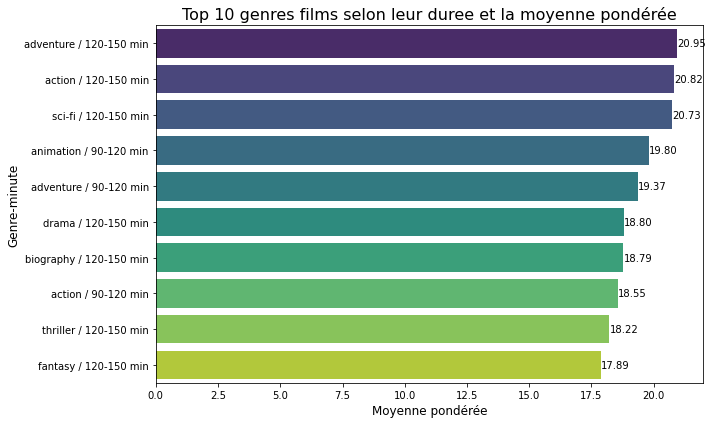

In [651]:


plt.figure(figsize=(10,6))
ax = sns.barplot(x='WR', y='genre_minute', data=top_genre_minute, palette='viridis')

plt.title('Top 10 genres films selon leur duree et la moyenne pondérée', fontsize=16)
plt.xlabel('Moyenne pondérée', fontsize=12)
plt.ylabel('Genre-minute', fontsize=12)

# Ajouter les étiquettes de valeur WR à droite des barres
for i, (wr, genre_minute) in enumerate(zip(top_genre_minute['WR'], top_genre_minute['genre_minute'])):
    ax.text(wr, i, f"{wr:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show();


En se basant sur les genres uniques des films et de leurs durées, les films de moins de 150 minutes dominent largement le classement

- ### Voyons l'appréciation des genres de films en fonction des années

In [652]:
stat3=aggregation(movie_explode_df,['genres','start_year'])
stat3

,genres,start_year,total_vote,sum_note_ponderee
0,action,2010,11268601,231236766.1
1,action,2011,11453853,225285968.5
2,action,2012,12317060,243007700.5
3,action,2013,12291264,241363712.2
4,action,2014,14375993,290797960.8
...,...,...,...,...
228,western,2015,112172,1505445.9
229,western,2016,183793,3645880.7
230,western,2017,79775,1497369.3
231,western,2018,8540,107818.5


In [653]:
stat3.isnull().sum()

genres               0
start_year           0
total_vote           0
sum_note_ponderee    0
dtype: int64

In [654]:
stat3['R']=stat3['sum_note_ponderee']/stat3['total_vote']
stat3['R']

0      20.520450
1      19.669012
2      19.729359
3      19.637013
4      20.228026
         ...    
228    13.420871
229    19.836886
230    18.769907
231    12.625117
232    16.959205
Name: R, Length: 233, dtype: float64

In [655]:
#les valeur de facteur['total_vote'] sont tres eleves pour eviter de biaiser les calculs, evitons les nombres de votes qui sont les plus faibles en prenant le 75e quantile
m=stat3['total_vote'].quantile(0.75)
m

3813163.0

In [656]:
stat3['WR']=(stat3['total_vote']/(stat3['total_vote']+m))*stat3['R']+(m/(m+stat3['total_vote']))*C
stat3=stat3.sort_values(by='WR', ascending=False)
stat3

,genres,start_year,total_vote,sum_note_ponderee,R,WR
16,adventure,2014,11451403,245816103.0,21.466025,17.826870
12,adventure,2010,10627437,227404027.5,21.397824,17.569032
4,action,2014,14375993,290797960.8,20.228026,17.433535
14,adventure,2012,9995481,212612306.3,21.270843,17.301890
17,adventure,2015,9503355,203586142.9,21.422555,17.263482
...,...,...,...,...,...,...
192,short,2018,8,140.8,17.600000,6.898057
170,reality-tv,2017,6,122.4,20.400000,6.898056
171,reality-tv,2018,10,108.0,10.800000,6.898045
102,game-show,2013,7,63.0,9.000000,6.898038


In [657]:
top_genre_year=stat3.head(10)
top_genre_year

,genres,start_year,total_vote,sum_note_ponderee,R,WR
16,adventure,2014,11451403,245816103.0,21.466025,17.826870
12,adventure,2010,10627437,227404027.5,21.397824,17.569032
4,action,2014,14375993,290797960.8,20.228026,17.433535
14,adventure,2012,9995481,212612306.3,21.270843,17.301890
17,adventure,2015,9503355,203586142.9,21.422555,17.263482
0,action,2010,11268601,231236766.1,20.520450,17.076258
5,action,2015,10286739,211330082.3,20.543934,16.853551
18,adventure,2016,9618308,199253720.6,20.716089,16.793176
76,drama,2014,16222455,308957963.7,19.045081,16.733264
2,action,2012,12317060,243007700.5,19.729359,16.696051


In [658]:
top_genre_year['start_year']= top_genre_year['start_year'].astype(str)
top_genre_year['genre_year']= top_genre_year['genres']+' / '+top_genre_year['start_year']
top_genre_year

,genres,start_year,total_vote,sum_note_ponderee,R,WR,genre_year
16,adventure,2014,11451403,245816103.0,21.466025,17.826870,adventure / 2014
12,adventure,2010,10627437,227404027.5,21.397824,17.569032,adventure / 2010
4,action,2014,14375993,290797960.8,20.228026,17.433535,action / 2014
14,adventure,2012,9995481,212612306.3,21.270843,17.301890,adventure / 2012
17,adventure,2015,9503355,203586142.9,21.422555,17.263482,adventure / 2015
0,action,2010,11268601,231236766.1,20.520450,17.076258,action / 2010
5,action,2015,10286739,211330082.3,20.543934,16.853551,action / 2015
18,adventure,2016,9618308,199253720.6,20.716089,16.793176,adventure / 2016
76,drama,2014,16222455,308957963.7,19.045081,16.733264,drama / 2014
2,action,2012,12317060,243007700.5,19.729359,16.696051,action / 2012


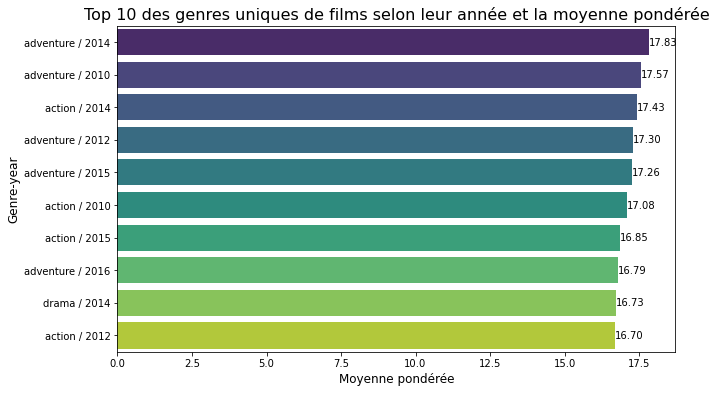

In [672]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='WR', y='genre_year', data=top_genre_year, palette='viridis')
plt.title('Top 10 des genres uniques de films selon leur année et la moyenne pondérée', fontsize=16)
plt.xlabel('Moyenne pondérée', fontsize=12)
plt.ylabel('Genre-year', fontsize=12)

for i,(wr,genre_year) in enumerate(zip(top_genre_year['WR'], top_genre_year['genre_year'])):
    ax.text(wr, i, f"{wr:.2f}", va='center', fontsize=10)
    
plt.tight_layout
plt.show()

- Les genres actions et adventure de 2010-2016 dominent le classement des top 10

- ### Maintenant quels sont les meilleures combinaison de genres de films

In [661]:
movie_df['genres']

0                [action, crime, drama]
1                    [biography, drama]
2                               [drama]
4              [comedy, drama, fantasy]
6        [adventure, animation, comedy]
                      ...              
73849                           [drama]
73850                     [documentary]
73851                     [documentary]
73852                   [drama, family]
73855                     [documentary]
Name: genres, Length: 65718, dtype: object

In [662]:
#Cleaning des genres et tri
movie_df_combinaison =movie_df.copy()
movie_df_combinaison['new_genres']= movie_df_combinaison['genres'].apply(lambda x: sorted([g.strip() for g in x if g.strip()]))
movie_df_combinaison.drop(columns='genres', inplace=True)
movie_df_combinaison

,movie_id,original_title,runtime_minutes,start_year,averagerating,numvotes,new_genres
0,tt0063540,sunghursh,175.0,2013,7.0,77,"[action, crime, drama]"
1,tt0066787,ashad ka ek din,114.0,2019,7.2,43,"[biography, drama]"
2,tt0069049,the other side of the wind,122.0,2018,6.9,4517,[drama]
4,tt0100275,la telenovela errante,80.0,2017,6.5,119,"[comedy, drama, fantasy]"
6,tt0137204,joe finds grace,83.0,2017,8.1,263,"[adventure, animation, comedy]"
...,...,...,...,...,...,...,...
73849,tt9911774,padmavyuhathile abhimanyu,130.0,2019,8.4,365,[drama]
73850,tt9913056,swarm season,86.0,2019,6.2,5,[documentary]
73851,tt9913084,diabolik sono io,75.0,2019,6.2,6,[documentary]
73852,tt9914286,sokagin çocuklari,98.0,2019,8.7,136,"[drama, family]"


In [663]:
# Conversion liste en chaine
movie_df_combinaison['genre_combinaison'] =movie_df_combinaison['new_genres'].apply(lambda x: ' ,'.join(x))
movie_df_combinaison.drop(columns='new_genres', inplace=True)
movie_df_combinaison 

,movie_id,original_title,runtime_minutes,start_year,averagerating,numvotes,genre_combinaison
0,tt0063540,sunghursh,175.0,2013,7.0,77,"action ,crime ,drama"
1,tt0066787,ashad ka ek din,114.0,2019,7.2,43,"biography ,drama"
2,tt0069049,the other side of the wind,122.0,2018,6.9,4517,drama
4,tt0100275,la telenovela errante,80.0,2017,6.5,119,"comedy ,drama ,fantasy"
6,tt0137204,joe finds grace,83.0,2017,8.1,263,"adventure ,animation ,comedy"
...,...,...,...,...,...,...,...
73849,tt9911774,padmavyuhathile abhimanyu,130.0,2019,8.4,365,drama
73850,tt9913056,swarm season,86.0,2019,6.2,5,documentary
73851,tt9913084,diabolik sono io,75.0,2019,6.2,6,documentary
73852,tt9914286,sokagin çocuklari,98.0,2019,8.7,136,"drama ,family"


In [664]:
movie_df_combinaison[['averagerating', 'numvotes']].isna().sum()


averagerating    0
numvotes         0
dtype: int64

In [665]:
movie_df_combinaison['note_ponderee'] = movie_df_combinaison['averagerating'] * movie_df_combinaison['numvotes']

def aggreg(movie_df_combinaison, grp_cols):
    return (
        movie_df_combinaison.groupby(grp_cols)
        .agg(
            total_vote=('numvotes', 'sum'),
            sum_note_ponderee=('note_ponderee', 'sum'),
        )
        .reset_index()
    )

In [666]:
stat4=aggreg(movie_df_combinaison,'genre_combinaison')
stat4

,genre_combinaison,total_vote,sum_note_ponderee
0,action,319126,1774360.6
1,"action ,adult ,comedy",8,47.2
2,"action ,adventure",108835,586006.8
3,"action ,adventure ,animation",3570049,27156551.2
4,"action ,adventure ,biography",999592,7604173.2
...,...,...,...
901,thriller,431778,2446084.3
902,"thriller ,war",7166,43722.2
903,"thriller ,western",13222,83551.2
904,war,5309,35429.5


In [667]:
stat4['R']=stat4['sum_note_ponderee']/stat4['total_vote']
stat4['R']

0      5.560063
1      5.900000
2      5.384360
3      7.606773
4      7.607277
         ...   
901    5.665143
902    6.101340
903    6.319105
904    6.673479
905    4.749178
Name: R, Length: 906, dtype: float64

In [668]:
#calcul de facteurs m, R
m=stat4['total_vote'].quantile(0.75)
m

57030.25

In [669]:
stat4['WR']=(stat4['total_vote']/(stat4['total_vote']+m))*stat4['R']+(m/(m+stat4['total_vote']))*C
stat4

,genre_combinaison,total_vote,sum_note_ponderee,R,WR
0,action,319126,1774360.6,5.560063,5.762917
1,"action ,adult ,comedy",8,47.2,5.900000,6.897895
2,"action ,adventure",108835,586006.8,5.384360,5.904814
3,"action ,adventure ,animation",3570049,27156551.2,7.606773,7.595629
4,"action ,adventure ,biography",999592,7604173.2,7.607277,7.568996
...,...,...,...,...,...
901,thriller,431778,2446084.3,5.665143,5.808987
902,"thriller ,war",7166,43722.2,6.101340,6.809102
903,"thriller ,western",13222,83551.2,6.319105,6.789076
904,war,5309,35429.5,6.673479,6.878911


In [670]:
#recuperation des meilleures combinaisons
top=stat4.sort_values(by='WR', ascending=False)
top_n=top.head(10)
top_n = top_n.reset_index()
top_n

,index,genre_combinaison,total_vote,sum_note_ponderee,R,WR
0,217,"adventure ,drama ,sci-fi",1986339,16652546.6,8.383537,8.342077
1,771,"drama ,western",1314648,10852947.7,8.255402,8.198967
2,728,"drama ,music",940984,7502676.5,7.973224,7.911784
3,747,"drama ,mystery ,war",130789,1077131.1,8.235640,7.829484
4,306,"animation ,drama ,fantasy",229227,1842516.0,8.037954,7.810851
5,884,"mystery ,thriller",1397857,10879188.8,7.782762,7.748082
6,360,"biography ,comedy ,drama",2418060,18709778.7,7.737516,7.718173
7,401,"biography ,drama ,thriller",1858897,14277887.1,7.680838,7.657537
8,379,"biography ,documentary ,music",213353,1668272.8,7.819308,7.624989
9,95,"action ,drama ,war",616213,4739269.3,7.690960,7.623791


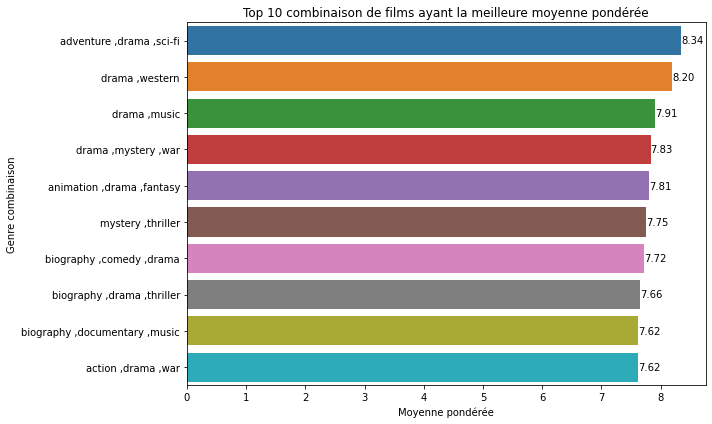

In [673]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='WR', y='genre_combinaison', data=top_n)

plt.title('Top 10 combinaison de films ayant la meilleure moyenne pondérée', fontsize=12)
plt.xlabel('Moyenne pondérée', fontsize=10)
plt.ylabel('Genre combinaison', fontsize=10)

for i, (wr, genre_combinaison) in enumerate(zip(top_n['WR'], top_n['genre_combinaison'])):
    ax.text(wr, i, f"{wr:.2f}", va="center", fontsize=10)

plt.tight_layout() 
plt.show();


Si les films de genres actions et adventures ont largement dominés le classement des genres uniques, il y a bien des modicfications lorsque les genres sont combinés puis que dans le top 10, on rencontre des combinaisons de: biography-documentary-music et drama-music qui sont bien notés. 

In [692]:
#Categorisons les films en intervalles
maxi=movie_df_combinaison['runtime_minutes'].max()
bins = [0, 60, 90, 120, 150, 180, 240, maxi] 
label = ['<60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', '180-240 min','>240 min']

movie_df_combinaison['runtime_bin'] = pd.cut(
    movie_df_combinaison['runtime_minutes'],
    bins=bins,
    labels=label,
    right=False,          
    include_lowest=True)
movie_df_combinaison

,movie_id,original_title,runtime_minutes,start_year,averagerating,numvotes,genre_combinaison,note_ponderee,runtime_bin
0,tt0063540,sunghursh,175.0,2013,7.0,77,"action ,crime ,drama",539.0,150-180 min
1,tt0066787,ashad ka ek din,114.0,2019,7.2,43,"biography ,drama",309.6,90-120 min
2,tt0069049,the other side of the wind,122.0,2018,6.9,4517,drama,31167.3,120-150 min
4,tt0100275,la telenovela errante,80.0,2017,6.5,119,"comedy ,drama ,fantasy",773.5,60-90 min
6,tt0137204,joe finds grace,83.0,2017,8.1,263,"adventure ,animation ,comedy",2130.3,60-90 min
...,...,...,...,...,...,...,...,...,...
73849,tt9911774,padmavyuhathile abhimanyu,130.0,2019,8.4,365,drama,3066.0,120-150 min
73850,tt9913056,swarm season,86.0,2019,6.2,5,documentary,31.0,60-90 min
73851,tt9913084,diabolik sono io,75.0,2019,6.2,6,documentary,37.2,60-90 min
73852,tt9914286,sokagin çocuklari,98.0,2019,8.7,136,"drama ,family",1183.2,90-120 min


In [693]:
stat5=aggreg(movie_df_combinaison,['genre_combinaison','runtime_bin'])
stat5.isnull().sum()

genre_combinaison       0
runtime_bin             0
total_vote           3917
sum_note_ponderee    3917
dtype: int64

In [694]:
stat5=stat5.dropna()

In [695]:
stat5['R']=stat4['sum_note_ponderee']/stat4['total_vote']

In [696]:
m=stat5['total_vote'].quantile(0.75)

In [697]:
stat5['WR']=(stat5['total_vote']/(stat5['total_vote']+m))*stat5['R']+(m/(m+stat5['total_vote']))*C
stat5=stat5.sort_values(by='WR', ascending=False)

In [698]:
top2=stat5.sort_values(by='WR', ascending=False)
top_n2=top2.head(10)
top_n2 = top_n2.reset_index()
top_n2

,index,genre_combinaison,runtime_bin,total_vote,sum_note_ponderee,R,WR
0,668,"action ,drama ,war",120-150 min,549167.0,4337854.8,8.800000,8.751997
1,660,"action ,drama ,thriller",90-120 min,1385855.0,8993027.4,8.709822,8.691422
2,625,"action ,drama ,mystery",90-120 min,210844.0,1302142.8,8.574138,8.468245
3,73,"action ,adventure ,fantasy",120-150 min,4201043.0,29063404.9,7.973654,7.970026
4,646,"action ,drama ,sci-fi",90-120 min,1836734.0,12813212.8,7.972016,7.963766
5,387,"action ,comedy ,sport",90-120 min,82081.0,524710.4,8.075338,7.901505
6,627,"action ,drama ,mystery",150-180 min,334530.0,2473910.6,7.944068,7.901420
7,261,"action ,biography ,crime",90-120 min,34491.0,242606.7,8.300000,7.890750
8,65,"action ,adventure ,family",90-120 min,617785.0,3728631.9,7.900000,7.877458
9,298,"action ,comedy",150-180 min,49800.0,323135.3,8.062264,7.803682


In [699]:
top_n2['runtime_bin'] = top_n2['runtime_bin'].astype(str)
top_n2['genre_minute'] = top_n2['genre_combinaison'] + ' / ' + top_n2['runtime_bin']

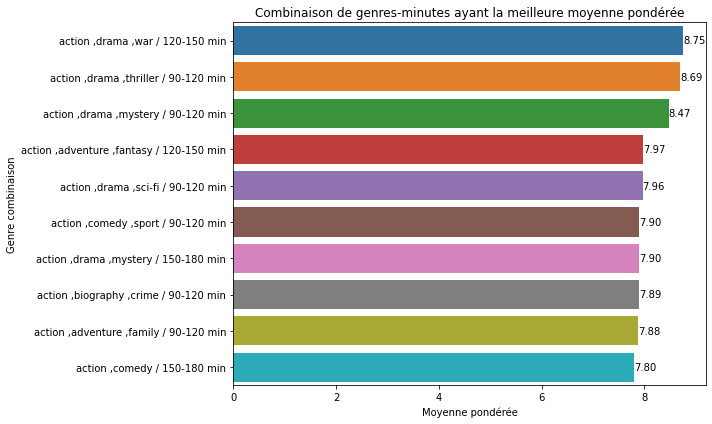

In [700]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='WR', y='genre_minute', data=top_n2)

plt.title('Top 10 combinaison de genres-minutes ayant la meilleure moyenne pondérée', fontsize=12)
plt.xlabel('Moyenne pondérée', fontsize=10)
plt.ylabel('Genre combinaison', fontsize=10)

for i, (wr, genre_combinaison) in enumerate(zip(top_n2['WR'], top_n2['genre_combinaison'])):
    ax.text(wr, i, f"{wr:.2f}", va="center", fontsize=10)

plt.tight_layout() 
plt.show();

Si dans le classement des genres uniques, ce sont les genres adventure et action de moins de 150 minutes qui ont dominé le classement, pour les genres combinés ce sont les genres: action-drama-war, action-drama-thriller qui ont receuilli les plus bonnes moyennes pondérées.

- ### Analyse sur les personnages ayant ecrit les films qui on fait le plus de succes suivant le score pondere

In [701]:
writers = pd.read_sql("SELECT * FROM writers", conn)
persons = pd.read_sql("SELECT person_id, primary_name AS name, primary_profession AS profession FROM persons", conn)

writers['role'] = 'writer'

# joindre avec persons pour avoir infos sur les personnes
perso_full = pd.merge(persons, writers, on='person_id', how='inner')
perso_full

,person_id,name,profession,movie_id,role
0,nm0064023,Bryan Beasley,"director,producer,writer",tt3501180,writer
1,nm0065847,Michael Frost Beckner,"writer,producer,miscellaneous",tt6349302,writer
2,nm0068874,Hava Kohav Beller,"director,writer,producer",tt7701650,writer
3,nm0070482,Joel Bender,"editor,director,writer",tt3790232,writer
4,nm0070482,Joel Bender,"editor,director,writer",tt3790232,writer
...,...,...,...,...,...
255866,nm9980896,Rama Narayanan,"director,writer",tt8715016,writer
255867,nm9981679,Samir Eshra,"director,writer,cinematographer",tt8717234,writer
255868,nm9993380,Pegasus Envoyé,"director,actor,writer",tt8743182,writer
255869,nm9993380,Pegasus Envoyé,"director,actor,writer",tt8743182,writer


In [702]:
movie_df_combinaison

,movie_id,original_title,runtime_minutes,start_year,averagerating,numvotes,genre_combinaison,note_ponderee,runtime_bin
0,tt0063540,sunghursh,175.0,2013,7.0,77,"action ,crime ,drama",539.0,150-180 min
1,tt0066787,ashad ka ek din,114.0,2019,7.2,43,"biography ,drama",309.6,90-120 min
2,tt0069049,the other side of the wind,122.0,2018,6.9,4517,drama,31167.3,120-150 min
4,tt0100275,la telenovela errante,80.0,2017,6.5,119,"comedy ,drama ,fantasy",773.5,60-90 min
6,tt0137204,joe finds grace,83.0,2017,8.1,263,"adventure ,animation ,comedy",2130.3,60-90 min
...,...,...,...,...,...,...,...,...,...
73849,tt9911774,padmavyuhathile abhimanyu,130.0,2019,8.4,365,drama,3066.0,120-150 min
73850,tt9913056,swarm season,86.0,2019,6.2,5,documentary,31.0,60-90 min
73851,tt9913084,diabolik sono io,75.0,2019,6.2,6,documentary,37.2,60-90 min
73852,tt9914286,sokagin çocuklari,98.0,2019,8.7,136,"drama ,family",1183.2,90-120 min


In [703]:
m=movie_df_combinaison['numvotes'].quantile(0.75)
m

352.0

In [704]:
V=movie_df_combinaison['numvotes']
R=movie_df_combinaison['averagerating']
movie_df_combinaison['WR']=((V/(V+m))*R)+((m/(m+V))*C)
movie_df_combinaison.sort_values(by='WR', ascending=False)

,movie_id,original_title,runtime_minutes,start_year,averagerating,numvotes,genre_combinaison,note_ponderee,runtime_bin,WR
65296,tt7131622,once upon a time ... in hollywood,159.0,2019,9.7,5600,"comedy ,drama",54320.0,150-180 min,9.534292
58030,tt5963218,aloko udapadi,113.0,2017,9.5,6509,"drama ,history",61835.5,90-120 min,9.366508
68282,tt7738784,peranbu,147.0,2018,9.4,9629,drama,90512.6,120-150 min,9.311763
56850,tt5813916,dag ii,135.0,2016,9.3,100568,"action ,drama ,war",935282.4,120-150 min,9.291622
58721,tt6058226,ekvtime: man of god,132.0,2018,9.6,2604,"biography ,drama ,history",24998.4,120-150 min,9.278250
...,...,...,...,...,...,...,...,...,...,...
41971,tt4009460,saving christmas,79.0,2014,1.5,14221,"comedy ,family",21331.5,60-90 min,1.630386
7781,tt1702443,justin bieber: never say never,105.0,2011,1.6,74978,"documentary ,music",119964.8,90-120 min,1.624757
45558,tt4404474,kartoffelsalat,81.0,2015,1.3,6249,"comedy ,horror",8123.7,60-90 min,1.598517
45975,tt4458206,kod adi k.o.z.,114.0,2015,1.5,26723,"crime ,mystery",40084.5,90-120 min,1.570179


In [705]:
top=movie_df_combinaison.sort_values(by='WR', ascending=False)
topp=top[['movie_id','original_title','genre_combinaison','WR']]
toppn=topp.head(10)

In [712]:
#tableau de presentation des ecrivains 
famousp=pd.merge(toppn,perso_full,on='movie_id', how='inner')
# Garder les movie_id uniques
famousp_unique = famousp.drop_duplicates(subset='movie_id')
famous=famousp_unique.style.set_properties(subset=['name'], **{'font-weight': 'bold'})
famous

,movie_id,original_title,genre_combinaison,WR,person_id,name,profession,role
0,tt7131622,once upon a time ... in hollywood,"comedy ,drama",9.534292,nm0000233,Quentin Tarantino,"writer,actor,producer",writer
1,tt5963218,aloko udapadi,"drama ,history",9.366508,nm5465931,Saman Weeraman,"writer,director,actor",writer
3,tt7738784,peranbu,drama,9.311763,nm3591496,Ram,"director,writer,actor",writer
9,tt5813916,dag ii,"action ,drama ,war",9.291622,nm3809021,Alper Caglar,"producer,writer,editor",writer
10,tt6058226,ekvtime: man of god,"biography ,drama ,history",9.278250,nm3123304,Nikoloz Khomasuridze,"producer,director,writer",writer
12,tt5354160,aynabaji,"crime ,mystery ,thriller",9.255080,nm7861816,Syed Gaosul Alam Shaon,"miscellaneous,writer",writer
15,tt2170667,wheels,drama,9.252124,nm1919905,Donavon Warren,"producer,actor,director",writer
17,tt2592910,cm101mmxi fundamentals,"comedy ,documentary",9.180667,nm0948000,Cem Yilmaz,"actor,writer,director",writer
18,tt4131686,i want to live,"adventure ,biography ,documentary",9.037557,nm6748553,Karzan Kardozi,"director,writer,producer",writer
19,tt5311546,natsamrat,"drama ,family",9.025706,nm0542498,Mahesh Manjrekar,"actor,writer,director",writer


- ## Aspect economique

- ### Travaillons maintenant avec les autres sources de donnees

- tn.movie_budgets.csv.gz

In [713]:
#modification du nom de colonne original_title en movie pour faciliter la jonction des deux tables
movie_df_combinaison.rename(columns={'original_title': 'movie'}, inplace=True)

In [714]:
tn_movie_budget.sort_values(by='production_budget', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0
5778,79,"Apr 2, 1999",following,6000,48482,240495
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0


In [715]:
#frame avec moins de colonne
movie_budget=tn_movie_budget[['movie','production_budget','domestic_gross','worldwide_gross']]
movie=movie_df_combinaison[['averagerating','numvotes','movie','genre_combinaison','WR']]
#calcul des revenus totaux
movie_budget['revenu_total']=movie_budget['domestic_gross']+movie_budget['worldwide_gross']

In [716]:
df_budget=pd.merge(movie,movie_budget, on='movie', how='inner')
df_budget.sort_values(by='WR', ascending=False)

,averagerating,numvotes,movie,genre_combinaison,WR,production_budget,domestic_gross,worldwide_gross,revenu_total
522,8.8,1841066,inception,"action ,adventure ,sci-fi",8.799636,160000000,292576195,835524642,1128100837
95,8.6,1299334,interstellar,"adventure ,drama ,sci-fi",8.599539,165000000,188017894,666379375,854397269
2266,8.5,670926,avengers: infinity war,"action ,adventure ,sci-fi",8.499160,300000000,678815482,2048134200,2726949682
1831,8.5,616916,whiplash,"drama ,music",8.499086,3300000,13092006,38969037,52061043
2412,8.5,123638,dangal,"action ,biography ,drama",8.495452,9500000,12391761,294654618,307046379
...,...,...,...,...,...,...,...,...,...
1599,3.1,33515,left behind,"action ,drama ,fantasy",3.139475,18500000,4221341,4221341,8442682
1762,2.6,3381,30 nights of paranormal activity with the devi...,comedy,3.005279,3000000,0,0,0
1909,2.1,3878,united passions,"drama ,history ,sport",2.499269,30000000,918,168832,169750
0,1.9,8248,foodfight!,"action ,animation ,comedy",2.104571,45000000,0,73706,73706


In [717]:
#calcul des marges brutes et taux de marges
df_budget['marge_brute']=df_budget['revenu_total']-df_budget['production_budget']

- ### Y a-t-il un lien entre les films ayant les films qui ont les meilleurs scores et leurs marges

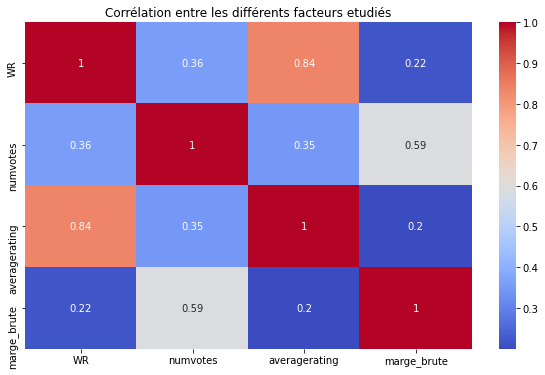

In [720]:
cols_of_interest = ['WR','numvotes','averagerating','marge_brute']

# Corrélation de pearson
correlation_matrix = df_budget[cols_of_interest].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les différents facteurs etudiés')
plt.show()

La matrice de corrélation révèle des degrés d'association variés entre les facteurs étudiés.  Ainsi,la relation la plus marquée est une corrélation très forte (r=0.84) entre le score pondéré (WR) et la note moyenne (averagerating). En ce qui concerne les facteurs financiers, le nombre de votes (numvotes) présente une corrélation faible (r=0.59) avec la marge brute, suggérant un faible lien entre l'engagement du public et le succès commercial. En revanche, la note moyenne (averagerating) n'affiche qu'une corrélation très faible (r=0.20) avec la marge brute.

In [721]:
X = df_budget[['WR']]  # ou ['averagerating', 'numvotes']
y = df_budget['marge_brute']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            marge_brute   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     127.0
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           8.67e-29
Time:                        19:57:36   Log-Likelihood:                -53471.
No. Observations:                2590   AIC:                         1.069e+05
Df Residuals:                    2588   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.583e+08   3.32e+07     -7.781      0.0

In [722]:
X = df_budget['numvotes']  # ou ['averagerating', 'numvotes']
y = df_budget['marge_brute']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            marge_brute   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sun, 27 Jul 2025   Prob (F-statistic):          6.84e-244
Time:                        19:57:44   Log-Likelihood:                -52977.
No. Observations:                2590   AIC:                         1.060e+05
Df Residuals:                    2588   BIC:                         1.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.982e+07   4.12e+06      9.657      0.0

Bien que numvotes soit significativement associé à la marge (p < 0.05), cette relation est modéré (r=0.59). Cela signifie que d'autres facteurs influencent probablement la rentabilité, et que le nombre de votes à lui seul ne peut pas prédire avec précision les résultats financiers d’un film. Néanmoins, comparé à d'autres variables comme WR (R² ≈ 0.047, soit r ≈ 0.22 – association faible), le nombre de votes reste nettement plus informatif selon les données "tn.movie_budgets.csv.gz".

Toutefois, la distribution très asymétrique des résidus montre que certains films obtiennent des marges extrêmement élevées (outliers), ce qui limite la qualité prédictive du modèle sur l’ensemble des données.

- bom.movie_gross.csv.gz

In [723]:
bom_movie['revenu_total']=bom_movie['domestic_gross']+bom_movie['foreign_gross']
bom_movie.rename(columns={'title': 'movie'}, inplace=True)
bom_movie.sort_values(by='revenu_total', ascending=False)

,movie,studio,domestic_gross,foreign_gross,year,revenu_total
727,marvel's the avengers,bv,623400000.0,895500000.0,2012,1.518900e+09
1875,avengers: age of ultron,bv,459000000.0,946400000.0,2015,1.405400e+09
3080,black panther,bv,700100000.0,646900000.0,2018,1.347000e+09
328,harry potter and the deathly hallows part 2,wb,381000000.0,960500000.0,2011,1.341500e+09
2758,star wars: the last jedi,bv,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...,...
711,i'm glad my mother is alive,strand,8700.0,13200.0,2011,2.190000e+04
322,the thorn in the heart,osci.,7400.0,10500.0,2010,1.790000e+04
1110,cirkus columbia,strand,3500.0,9500.0,2012,1.300000e+04
715,aurora,cgld,5700.0,5100.0,2011,1.080000e+04


In [724]:
df_budget2=pd.merge(movie,bom_movie, on='movie', how='inner')
df_budget2.sort_values(by='revenu_total', ascending=False)

,averagerating,numvotes,movie,genre_combinaison,WR,studio,domestic_gross,foreign_gross,year,revenu_total
1111,7.3,665594,avengers: age of ultron,"action ,adventure ,sci-fi",7.299788,bv,459000000.0,946400000.0,2015,1.405400e+09
849,7.3,516148,black panther,"action ,adventure ,sci-fi",7.299726,bv,700100000.0,646900000.0,2018,1.347000e+09
1434,6.2,219125,jurassic world: fallen kingdom,"action ,adventure ,sci-fi",6.201120,uni.,417700000.0,891800000.0,2018,1.309500e+09
349,7.5,516998,frozen,"adventure ,animation ,comedy",7.499590,bv,400700000.0,875700000.0,2013,1.276400e+09
348,6.2,62311,frozen,"adventure ,drama ,sport",6.203921,bv,400700000.0,875700000.0,2013,1.276400e+09
...,...,...,...,...,...,...,...,...,...,...
416,7.5,200,aurora,"comedy ,drama ,romance",7.116138,cgld,5700.0,5100.0,2011,1.080000e+04
415,6.3,7,aurora,drama,6.886374,cgld,5700.0,5100.0,2011,1.080000e+04
414,7.0,87,aurora,drama,6.918242,cgld,5700.0,5100.0,2011,1.080000e+04
413,6.1,2403,aurora,"romance ,sci-fi ,thriller",6.201963,cgld,5700.0,5100.0,2011,1.080000e+04


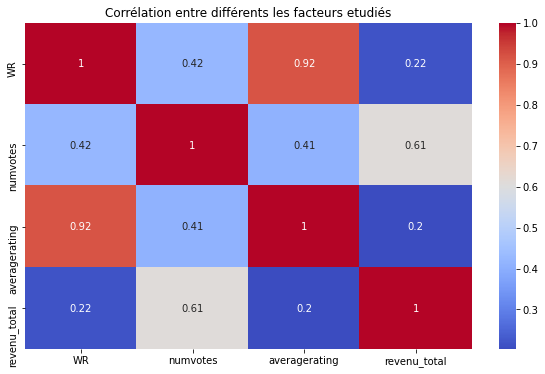

In [725]:
colonne_interet = ['WR','numvotes','averagerating','revenu_total']

# Corrélation de pearson
correlation_matrix = df_budget2[colonne_interet].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre différents les facteurs etudiés')
plt.show()

Cette matrice de corrélation met en evidence les relations entre la réception des films et leur rentrée, mesurée cette fois par le revenu total. La note pondérée (WR) et la note moyenne (averagerating) maintiennent une corrélation très forte (r=0.91), confirmant leur lien. Fait marquant, le nombre de votes (numvotes) affiche une corrélation forte (r=0.61) avec le revenu total, suggérant que la participation du public est un facteur pertinent pour la performance économique d'un film. En contraste, la note moyenne (averagerating) ne montre qu'une corrélation faible (r=0.20) avec le revenu total, ce qui indique que, bien qu'un film soit bien noté, cela ne se traduit pas nécessairement par des revenus substantiels, et d'autres facteurs liés à la popularité semblent jouer un rôle plus prépondérant.

In [726]:
X = df_budget2[['WR']]  # ou ['averagerating', 'numvotes']
y = df_budget2['revenu_total']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           revenu_total   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     77.24
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           3.91e-18
Time:                        20:10:41   Log-Likelihood:                -32116.
No. Observations:                1562   AIC:                         6.424e+04
Df Residuals:                    1560   BIC:                         6.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.01e+08   3.89e+07     -5.173      0.0

Ce modèle de régression linéaire, qui tente d'expliquer le revenu_total par la variable WR (Weighted Rating) sur 1562 observations, révèle que le WR a un effet statistiquement significatif et positif sur les revenus (coefficient de 52.18 millions par point de WR, p-value < 0.000). Cependant, le pouvoir explicatif du modèle est extrêmement faible, avec un R-squared de seulement 0.047, ce qui signifie que le WR n'explique qu'environ 4.7% de la variation des revenus totaux

In [727]:
X = df_budget2['numvotes']  # ou ['averagerating', 'numvotes']
y = df_budget2['revenu_total']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           revenu_total   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     920.8
Date:                Sun, 27 Jul 2025   Prob (F-statistic):          2.36e-159
Time:                        20:10:44   Log-Likelihood:                -31792.
No. Observations:                1562   AIC:                         6.359e+04
Df Residuals:                    1560   BIC:                         6.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.96e+07   5.13e+06      9.676      0.0

Ce second modèle de régression OLS, qui cherche à expliquer le revenu_total par la variable numvotes (nombre de votes) sur 1562 observations, montre une amélioration significative par rapport au modèle précédent. Le numvotes exerce un effet statistiquement très significatif et positif sur les revenus (coefficient de 815.67 pour chaque vote, p-value < 0.000). Le pouvoir explicatif du modèle est cette fois modéré, avec un R-squared de 0.371, indiquant que 37.1% de la variation du revenu_total est expliquée par le numvotes.

# Conclusion

Ce travail d'analyse met en evidence plusieurs dynamiques clés du marché cinématographique.À partir de données issues de sources telles qu’IMDb, *tn.movie\_budgets.csv.gz* et *bom.movie\_gross.csv.gz*. En combinant des informations sur la réception critique, la participation du public (votes), les genres de films et les données financières, nous avons  pu conclure:

**Les notes moyennes des films présentent une distribution asymétrique**, avec une concentration importante de films faiblement notés. Cela justifie pleinement l’usage d’une **approche bayésienne de pondération** (Weighted Rating) pour éviter les biais induits par les films ayant très peu de votes mais des notes artificiellement élevées. Grâce à cette méthode, nous avons pu identifier de manière plus fiable les genres de films perçus comme les plus qualitatifs par un large public.

Les analyses par genres indiquent que, en termes de qualité perçue, les films qui ont pour genres uniques "adventure", "drama", "sci-fi" et "action" dominent nettement, surtout lorsqu'ils ne dépassent pas les 150 minutes. Cependant, lorsque l’on récupère les combinaisons de genres en fonction du score pondéré , des catégories moins attendues comme "biography-documentary-music" ou "drama-music" font leur apparition, à coté des genres « action-drama-war », « action-drama-thriller »,  « action-drama-mystery », « action-adventure-fantasy »… soulignant la richesse des niches qualitatives.

Du point de vue **des personnalités créatives**, certains auteurs ou producteurs comme **Quentin Tarantino** ou **Alper Caglar** apparaissent régulièrement derrière des films bien notés, ce qui suggère que **le talent des personnes impliquées dans la production peut fortement influencer la réception publique**.

Sur le plan économique, les **résultats financiers sont beaucoup plus corrélés au nombre de votes (popularité)** qu’à la note moyenne. Le **numvotes** est à la fois **faiblement corrélé à la marge brute (r ≈ 0.59)** en se basant sur les données **tn.movie\_budgets.csv.gz** et **modérément corrélé au revenu total (r ≈ 0.61)**. À l’inverse, la note moyenne seule (averagerating) n’a qu’un pouvoir explicatif faible, ce qui souligne qu’**un film peut être apprécié sans pour autant rencontrer un succès commercial notable**.

Enfin, les **modèles de régression** confirment que **le nombre de votes** est un **bien meilleur prédicteur des revenus que la note moyenne ou la note pondérée**. Bien que la qualité reste essentielle, elle ne suffit pas à garantir le succès : **la visibilité et l’engagement du public sont des facteurs clés**.

### **Recommandations stratégiques**


1. **Cibler les genres dominants mais optimiser leur format :**

   * Miser prioritairement sur **les films "adventure", "action", "sci-fi" et "drama"**, en veillant à **limiter leur durée à moins de 150 minutes**, ce qui maximise leur accessibilité tout en restant dans les préférences majoritaires.
   * En parallèle, explorer des **combinaisons de genres qualitatifs** comme *adventure-drama-sci_fi*,*action-drama-war*, *drama-mistery-war* et d'autres combinaisons comme *biography-music* ou *drama-mystery*, qui bénéficient d’une bonne reconnaissance critique toutes avec une durée inférieure à 150 minutes.

2. **Adopter une approche fondée sur la popularité potentielle :**

   * Se concentrer sur des projets qui peuvent **mobiliser un grand nombre de spectateurs (votes)**, en intégrant dès le début **des stratégies marketing fortes**.
   * Investir dans des productions qui ont **le potentiel de générer du bouche-à-oreille** et une visibilité virale, plutôt que de se fier uniquement à la qualité artistique.

3. **Recruter ou collaborer avec des talents expérimentés :**

   * Identifier et solliciter **des auteurs, réalisateurs ou producteurs** qui ont déjà été associés à des films à fort score pondéré.
   * Créer un réseau de **talents créatifs polyvalents** (ex. écrivains-producteurs-acteurs), capables de porter des projets solides dès leur conception.

4. **Allier rigueur analytique et test de marché :**

   * Utiliser des **tests d’audience** sur des bandes-annonces ou des synopsis pour estimer l’intérêt du public avant d’engager de lourds investissements.

5. **Éviter les pièges des "faux succès" :**

   * Se méfier des films très bien notés mais **avec peu de votes**, qui peuvent donner une image biaisée de leur potentiel.
   * Utiliser systématiquement une **pondération bayésienne (WR)** pour classer les projets ou scénarios.